In [40]:
# Data and NBA API
# !pip install nba_api

import pandas as pd
import numpy as np

from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.endpoints import fantasywidget
from nba_api.stats.endpoints import commonallplayers
from nba_api.stats.endpoints import playergamelog

pd.set_option('display.max_column', None)

In [104]:
class Player:
    def __init__(self, playerName):
        nba_players = players.get_players()
        player_info =  pd.json_normalize(nba_players) 
        player_info = player_info[player_info['full_name'] == playerName]

        self.player_id = player_info['id']
        self.full_name = player_info['full_name']
        self.first_name = player_info['first_name']
        self.last_name = player_info['last_name']
        self.is_active = player_info['is_active']
    
    def getPlayersStats(self, season=False):
        stats = playercareerstats.PlayerCareerStats(player_id=self.player_id)
        stats_df = stats.get_data_frames()[0]
        if season:
            stats_df1 = stats_df[stats_df['SEASON_ID'] == season]
            return stats_df1
        else:
            return stats_df
    
    def getPlayerGameLog(self, season=''):
        game_df = playergamelog.PlayerGameLog(player_id=self.player_id)
        game_df = game_df.get_data_frames()[0]

        return game_df
    

In [111]:
mj = Player('Michael Jordan')
mj_stats = mj.getPlayersStats()
mj_stats

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,893,1984-85,00,1610612741,CHI,22.0,82,82,3144.0,837,1625,0.515,9,52,0.173,630,746,0.845,167,367,534,481,196,69,291,285,2313
1,893,1985-86,00,1610612741,CHI,23.0,18,7,451.0,150,328,0.457,3,18,0.167,105,125,0.840,23,41,64,53,37,21,45,46,408
2,893,1986-87,00,1610612741,CHI,24.0,82,82,3281.0,1098,2279,0.482,12,66,0.182,833,972,0.857,166,264,430,377,236,125,272,237,3041
3,893,1987-88,00,1610612741,CHI,25.0,82,82,3311.0,1069,1998,0.535,7,53,0.132,723,860,0.841,139,310,449,485,259,131,252,270,2868
4,893,1988-89,00,1610612741,CHI,26.0,81,81,3255.0,966,1795,0.538,27,98,0.276,674,793,0.850,149,503,652,650,234,65,290,247,2633
5,893,1989-90,00,1610612741,CHI,27.0,82,82,3197.0,1034,1964,0.526,92,245,0.376,593,699,0.848,143,422,565,519,227,54,247,241,2753
6,893,1990-91,00,1610612741,CHI,28.0,82,82,3034.0,990,1837,0.539,29,93,0.312,571,671,0.851,118,374,492,453,223,83,202,229,2580
7,893,1991-92,00,1610612741,CHI,29.0,80,80,3102.0,943,1818,0.519,27,100,0.270,491,590,0.832,91,420,511,489,182,75,200,201,2404
8,893,1992-93,00,1610612741,CHI,30.0,78,78,3067.0,992,2003,0.495,81,230,0.352,476,569,0.837,135,387,522,428,221,61,207,188,2541
9,893,1994-95,00,1610612741,CHI,32.0,17,17,668.0,166,404,0.411,16,32,0.500,109,136,0.801,25,92,117,90,30,13,35,47,457


In [114]:
mj_stats[['SEASON_ID', 'PTS', 'AST', 'REB']]

,SEASON_ID,PTS,AST,REB
0,1984-85,2313,481,534
1,1985-86,408,53,64
2,1986-87,3041,377,430
3,1987-88,2868,485,449
4,1988-89,2633,650,652
5,1989-90,2753,519,565
6,1990-91,2580,453,492
7,1991-92,2404,489,511
8,1992-93,2541,428,522
9,1994-95,457,90,117


In [48]:
# player stats by ID all years
player_info = ['203954']

stats = playercareerstats.PlayerCareerStats(player_id=player_info)
stats_df = stats.get_data_frames()[0]

stats_df

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,203954,2016-17,00,1610612755,PHI,23.0,31,31,786.0,200,429,0.466,36,98,0.367,191,244,0.783,61,182,243,66,27,76,117,112,627
1,203954,2017-18,00,1610612755,PHI,24.0,63,63,1912.0,510,1056,0.483,66,214,0.308,359,467,0.769,143,547,690,199,40,111,234,209,1445
2,203954,2018-19,00,1610612755,PHI,25.0,64,64,2154.0,580,1199,0.484,79,263,0.300,522,649,0.804,160,711,871,234,46,122,226,211,1761
3,203954,2019-20,00,1610612755,PHI,26.0,51,51,1506.0,382,801,0.477,57,172,0.331,351,435,0.807,141,452,593,152,45,65,159,174,1172
4,203954,2020-21,00,1610612755,PHI,27.0,51,51,1585.0,461,899,0.513,58,154,0.377,471,548,0.859,113,426,539,145,50,69,159,123,1451
5,203954,2021-22,00,1610612755,PHI,28.0,68,68,2296.0,666,1334,0.499,93,251,0.371,654,803,0.814,146,650,796,284,77,99,214,181,2079
6,203954,2022-23,00,1610612755,PHI,29.0,66,66,2284.0,728,1328,0.548,66,200,0.330,661,771,0.857,113,557,670,274,66,112,226,205,2183
7,203954,2023-24,00,1610612755,PHI,29.0,34,34,1157.0,402,754,0.533,41,112,0.366,356,403,0.883,89,295,384,193,39,60,126,98,1201


In [38]:
new_df = fantasywidget.FantasyWidget(season=['2023-24'])
new_df1 = new_df.get_data_frames()[0]
new_df1.head()

,PLAYER_ID,PLAYER_NAME,PLAYER_POSITION,TEAM_ID,TEAM_ABBREVIATION,GP,MIN,FAN_DUEL_PTS,NBA_FANTASY_PTS,PTS,REB,AST,BLK,STL,TOV,FG3M,FGA,FG_PCT,FTA,FT_PCT
0,203954,Joel Embiid,C-F,1610612755,PHI,34,34.0,59.5,62.4,35.3,11.3,5.7,1.76,1.15,3.7,1.2,22.2,0.533,11.9,0.883
1,1629029,Luka Doncic,F-G,1610612742,DAL,44,37.7,59.5,61.6,34.6,8.8,9.5,0.59,1.48,3.9,4.0,23.9,0.489,9.3,0.776
2,203999,Nikola Jokic,C,1610612743,DEN,51,33.8,55.6,57.7,26.2,12.2,9.0,0.94,1.20,3.0,1.1,17.5,0.583,5.7,0.819
3,203507,Giannis Antetokounmpo,F,1610612749,MIL,51,35.0,55.0,57.4,30.7,11.2,6.3,1.06,1.37,3.5,0.5,18.9,0.609,11.1,0.657
4,1628983,Shai Gilgeous-Alexander,G,1610612760,OKC,50,34.6,51.7,54.8,31.1,5.6,6.6,0.86,2.24,2.2,1.2,19.9,0.547,9.1,0.890


In [45]:
df_players = commonallplayers.CommonAllPlayers()
df_players = df_players.get_data_frames()[0]
df_players

,PERSON_ID,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FIRST_LAST,ROSTERSTATUS,FROM_YEAR,TO_YEAR,PLAYERCODE,PLAYER_SLUG,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,TEAM_SLUG,GAMES_PLAYED_FLAG,OTHERLEAGUE_EXPERIENCE_CH
0,76001,"Abdelnaby, Alaa",Alaa Abdelnaby,0,1990,1994,HISTADD_alaa_abdelnaby,alaa_abdelnaby,0,,,,,None,Y,00
1,76002,"Abdul-Aziz, Zaid",Zaid Abdul-Aziz,0,1968,1977,HISTADD_zaid_abdul-aziz,zaid_abdul-aziz,0,,,,,None,Y,00
2,76003,"Abdul-Jabbar, Kareem",Kareem Abdul-Jabbar,0,1969,1988,HISTADD_kareem_abdul-jabbar,kareem_abdul-jabbar,0,,,,,None,Y,00
3,51,"Abdul-Rauf, Mahmoud",Mahmoud Abdul-Rauf,0,1990,2000,mahmoud_abdul-rauf,mahmoud_abdul-rauf,0,,,,,None,Y,00
4,1505,"Abdul-Wahad, Tariq",Tariq Abdul-Wahad,0,1997,2003,tariq_abdul-wahad,tariq_abdul-wahad,0,,,,,None,Y,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4902,1627790,"Zizic, Ante",Ante Zizic,0,2017,2019,ante_zizic,ante_zizic,0,,,,,None,Y,01
4903,78647,"Zoet, Jim",Jim Zoet,0,1982,1982,HISTADD_jim_zoet,jim_zoet,0,,,,,None,Y,00
4904,78648,"Zopf, Bill",Bill Zopf,0,1970,1970,HISTADD_zip_zopf,bill_zopf,0,,,,,None,Y,00
4905,1627826,"Zubac, Ivica",Ivica Zubac,1,2016,2023,ivica_zubac,ivica_zubac,1610612746,LA,Clippers,LAC,clippers,clippers,Y,01


In [118]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use(['ggplot'])

In [56]:
stats_df

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,203954,2016-17,00,1610612755,PHI,23.0,31,31,786.0,200,429,0.466,36,98,0.367,191,244,0.783,61,182,243,66,27,76,117,112,627
1,203954,2017-18,00,1610612755,PHI,24.0,63,63,1912.0,510,1056,0.483,66,214,0.308,359,467,0.769,143,547,690,199,40,111,234,209,1445
2,203954,2018-19,00,1610612755,PHI,25.0,64,64,2154.0,580,1199,0.484,79,263,0.300,522,649,0.804,160,711,871,234,46,122,226,211,1761
3,203954,2019-20,00,1610612755,PHI,26.0,51,51,1506.0,382,801,0.477,57,172,0.331,351,435,0.807,141,452,593,152,45,65,159,174,1172
4,203954,2020-21,00,1610612755,PHI,27.0,51,51,1585.0,461,899,0.513,58,154,0.377,471,548,0.859,113,426,539,145,50,69,159,123,1451
5,203954,2021-22,00,1610612755,PHI,28.0,68,68,2296.0,666,1334,0.499,93,251,0.371,654,803,0.814,146,650,796,284,77,99,214,181,2079
6,203954,2022-23,00,1610612755,PHI,29.0,66,66,2284.0,728,1328,0.548,66,200,0.330,661,771,0.857,113,557,670,274,66,112,226,205,2183
7,203954,2023-24,00,1610612755,PHI,29.0,34,34,1157.0,402,754,0.533,41,112,0.366,356,403,0.883,89,295,384,193,39,60,126,98,1201


In [90]:
joel_pts = stats_df[['SEASON_ID', 'PTS', 'AST', 'STL', 'REB']]
joel_pts

,SEASON_ID,PTS,AST,STL,REB
0,2016-17,627,66,27,243
1,2017-18,1445,199,40,690
2,2018-19,1761,234,46,871
3,2019-20,1172,152,45,593
4,2020-21,1451,145,50,539
5,2021-22,2079,284,77,796
6,2022-23,2183,274,66,670
7,2023-24,1201,193,39,384


<Axes: >

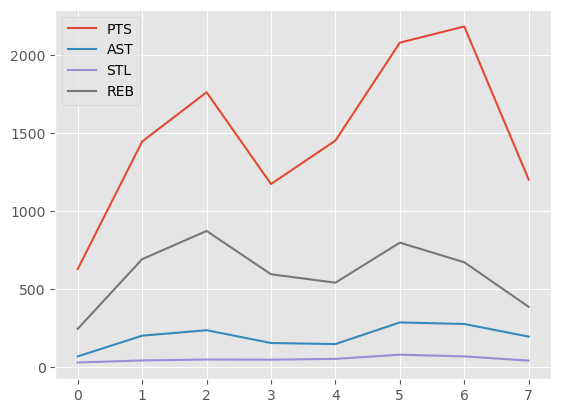

In [91]:
joel_pts.plot(kind='line', )

In [92]:
joel_pts.set_index('SEASON_ID', inplace=True)

In [93]:
joel_pts

,PTS,AST,STL,REB
SEASON_ID,,,,
2016-17,627,66,27,243
2017-18,1445,199,40,690
2018-19,1761,234,46,871
2019-20,1172,152,45,593
2020-21,1451,145,50,539
2021-22,2079,284,77,796
2022-23,2183,274,66,670
2023-24,1201,193,39,384


<Axes: xlabel='SEASON_ID'>

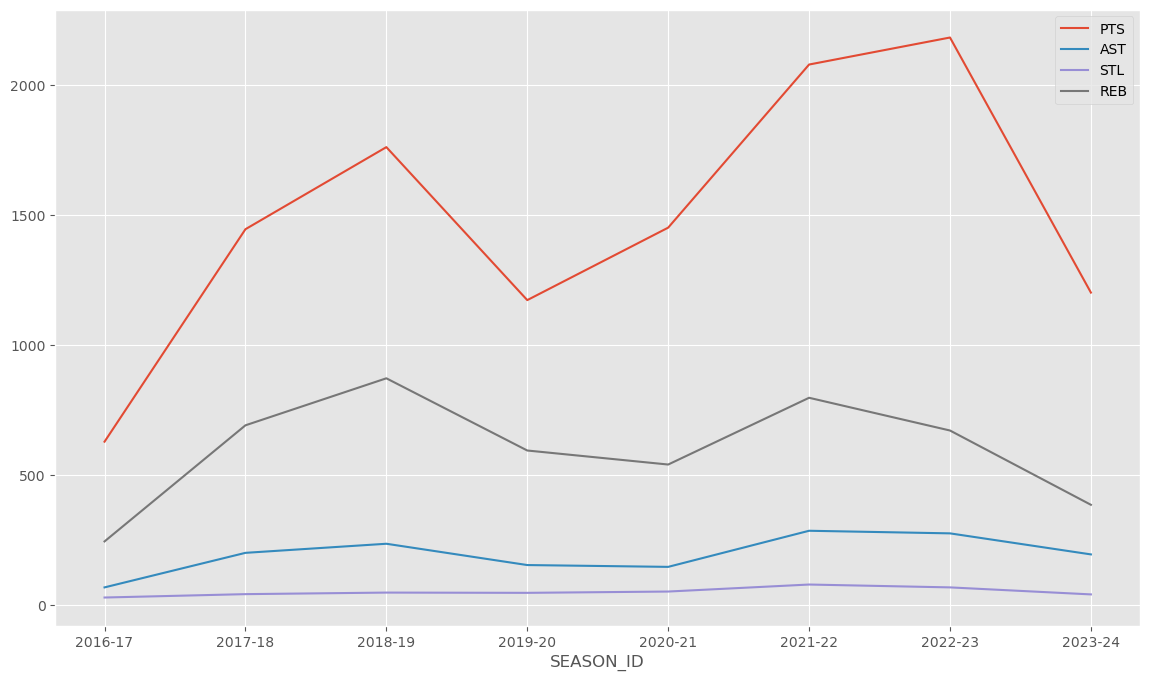

In [94]:
joel_pts.plot(kind='line', figsize= (14,8))